Sea levels have been rising at an alarming rate, and understanding this trend is crucial for predicting future impacts on coastal regions. This notebook dives into the data provided by the EPA to analyze sea level changes over time. If you find this analysis useful, please consider upvoting it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
file_path = '/kaggle/input/analysis-of-sea-level-rise-python/epa-sea-level.csv'
df = pd.read_csv(file_path)

### Initial Data Exploration

In [4]:
# Display the first few rows of the dataset
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### Data Cleaning and Preparation

In [5]:
# Check for missing values
df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      1
Lower Error Bound             1
Upper Error Bound             1
NOAA Adjusted Sea Level     113
dtype: int64

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

### Data Visualization

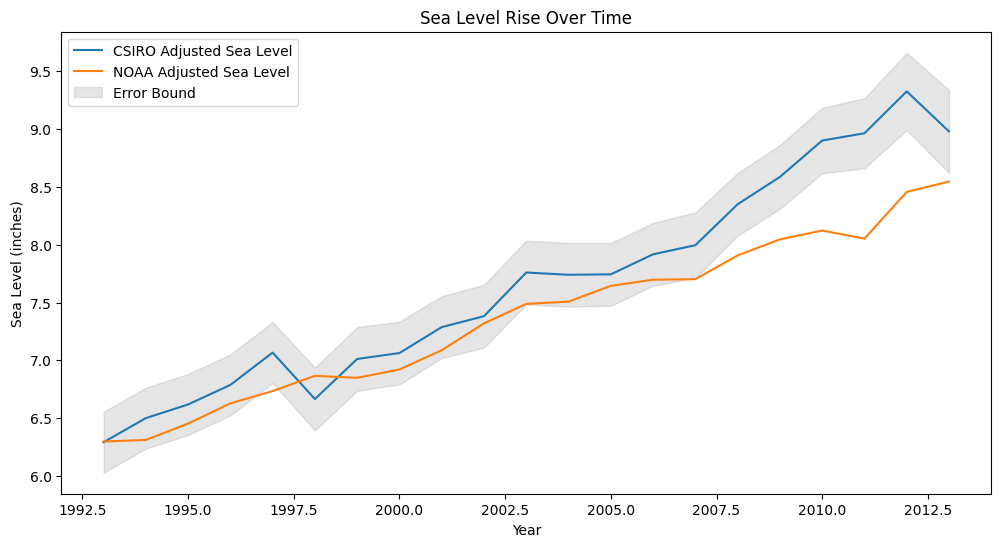

In [7]:
# Plotting the sea level data
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['CSIRO Adjusted Sea Level'], label='CSIRO Adjusted Sea Level')
plt.plot(df['Year'], df['NOAA Adjusted Sea Level'], label='NOAA Adjusted Sea Level')
plt.fill_between(df['Year'], df['Lower Error Bound'], df['Upper Error Bound'], color='gray', alpha=0.2, label='Error Bound')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Sea Level Rise Over Time')
plt.legend()
plt.show()

### Correlation Analysis

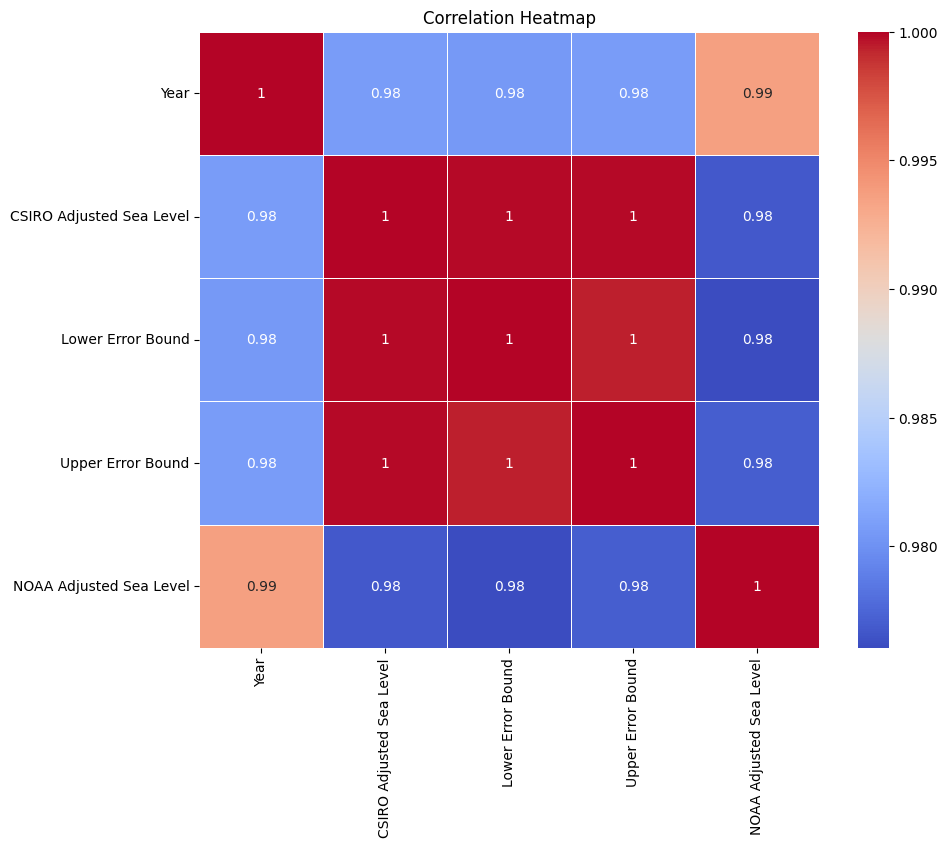

In [8]:
# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Predicting Future Sea Levels

In [9]:
# Prepare data for linear regression
X = df[['Year']]
y = df['CSIRO Adjusted Sea Level']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate prediction accuracy
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
mse, r2

(0.030387089239171845, 0.9617930785558163)

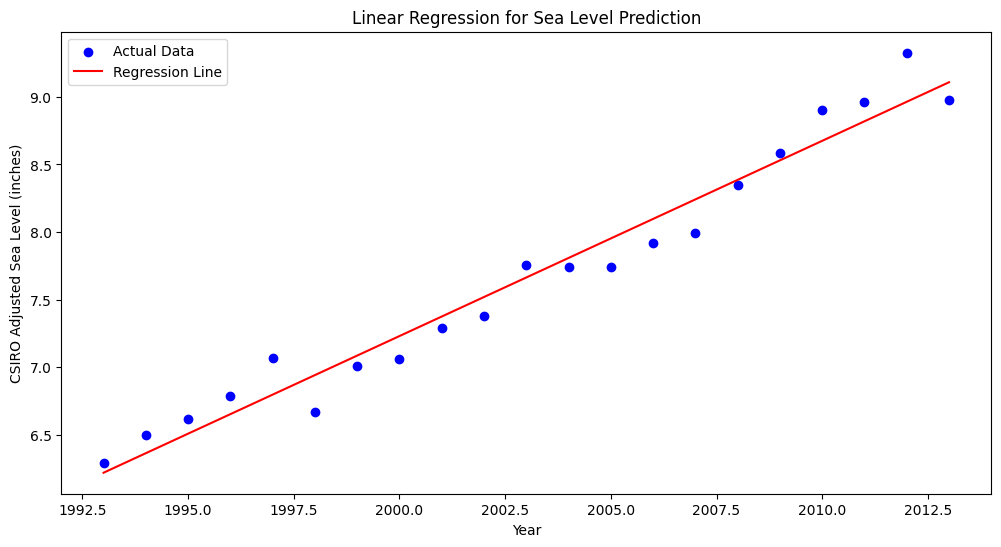

In [10]:
# Plot the regression line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Linear Regression for Sea Level Prediction')
plt.legend()
plt.show()

### Discussion and Future Analysis

The linear regression model provides a basic prediction of future sea levels based on historical data. However, there are many factors that could influence sea level rise, such as climate change, melting ice caps, and ocean currents. Future analysis could incorporate these variables to create a more robust predictive model.

What do you think would be useful to include in future analyses? Feel free to leave your thoughts and suggestions.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)